In [1]:
## Import dependencies
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from flask import Flask, jsonify, render_template
from sklearn.linear_model import LinearRegression
import yfinance as yf
from pathlib import Path

## Get our data: 
### - Pull historical data for each ticker using the yfinance python library
### - Export each ticker's data to a separate csv file

In [23]:
## Pull Stock Data using yfinance library
## Loop through list of tickers to pull the daily closing price and date for the last 10 years for each ticker
tickers = ['^GSPC', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'ALL', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AAPL', 'AMAT', 'APT', 'ADM', 'ANET', 'AJG', 'AIZ', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AVGO', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'BR', 'BF.B', 'BEN', 'CHRW', 'COG', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CERN', 'CF', 'CRL', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'COO', 'CPRT', 'CTVA', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'CRM', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'DVN', 'DXCM', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 'DXC', 'DGX', 'DIS', 'ED', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ENPH', 'ETR', 'EOG', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'FANG', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FMC', 'F', 'FTNT', 'FTV', 'FBHS', 'FOXA', 'FOX', 'FCX', 'GOOGL', 'GOOG', 'GLW', 'GPS', 'GRMN', 'GNRC', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'GWW', 'HAL', 'HBI', 'HIG', 'HAS', 'HCA', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HFC', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IT', 'IEX', 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JKHY', 'J', 'JBHT', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KMX', 'KO', 'KSU', 'K', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LNT', 'LB', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LEG', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LUMN', 'LYB', 'LUV', 'MMM', 'MO', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MKC', 'MXIM', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NSC', 'NTRS', 'NOC', 'NLOK', 'NCLH', 'NOV', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'NOW', 'ORLY', 'OXY', 'ODFL', 'OMC', 'OKE', 'ORCL', 'OTIS', 'O', 'PEAK', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PENN', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PTC', 'PEG', 'PSA', 'PHM', 'PVH', 'PWR', 'QRVO', 'QCOM', 'RE', 'RL', 'RJF', 'RTX', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SCHW', 'STZ', 'SJM', 'SPGI', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'SHW', 'SPG', 'SWKS', 'SNA', 'SO', 'SWK', 'SBUX', 'STT', 'STE', 'SYK', 'SIVB', 'SYF', 'SNPS', 'SYY', 'T', 'TAP', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TWTR', 'TYL', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'UNM', 'VLO', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VIAC', 'VTRS', 'V', 'VNO', 'VMC', 'WRB', 'WAB', 'WMT', 'WBA', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XRAY', 'XOM', 'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']
for ticker in tickers:
    ticker_data_df= yf.download(tickers = ticker, start="2011-01-01")
    ticker_df = ticker_data_df[["Close"]]
    ticker_df.reset_index(level=0, inplace=True)
## Export each ticker's data into it's own separate csv file
    ticker_df.to_csv(f"resources/data_tickers/{ticker}.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

## Calculate linear regressions: slopes, y-intercepts, and scores
### - First, let's test with one csv file at a time (sp500 and one stock):

In [2]:
## create path to sp500 csv and import data to dataframe
path = "resources/data_tickers/^GSPC.csv"
df = pd.read_csv(path)
df.columns

Index(['Unnamed: 0', 'Date', 'Close'], dtype='object')

In [3]:
## Rename index column from 'Unnamed: 0' to 'Day Number' 
    ##(header for index is blank in csv file, couldn't figure out how to fix in initial loop before exporting data to CSVs)
## Rename closing price column from 'Close' to 'Price'
df.rename(columns={'Unnamed: 0': 'Day Number', 'Date': 'Date', 'Close': 'Price'}, inplace = True)
df.columns

Index(['Day Number', 'Date', 'Price'], dtype='object')

In [4]:
## Create path to ABBV csv and import data to dataframe
## Rename columns
path_abbv = "resources/data_tickers/ABBV.csv"
abbv_df = pd.read_csv(path_abbv)
abbv_df.rename(columns={'Unnamed: 0': 'Day Number', 'Date': 'Date', 'Close': 'Price'}, inplace = True)
abbv_df.columns

Index(['Day Number', 'Date', 'Price'], dtype='object')

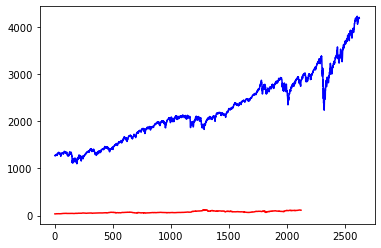

In [6]:
## Plot data from AAPL dataframe and from sp500 dataframe
plt.plot(df["Day Number"], df["Price"], c="b")
plt.plot(abbv_df["Day Number"], abbv_df[{"Price"}], c="r")
## Export graph image to images folder


In [18]:
## Use linear regression to find slope and y intercept of sp500 data
model = LinearRegression()
model.fit(np.array(df["Day Number"]).reshape(-1,1), df["Price"])
slope = model.coef_
intercept = model.intercept_
slope
intercept
print(f"y = {(slope)}x + {intercept}")

y = [0.91498815]x + 1044.8069298293121


In [8]:
## Use linear regression to find slope and y intercept of sp500 data
abbv_model = LinearRegression()
abbv_model.fit(np.array(abbv_df["Day Number"]).reshape(-1,1), abbv_df["Price"])
abbv_slope = abbv_model.coef_
abbv_intercept = abbv_model.intercept_
abbv_slope
abbv_intercept
print(f"y = {(abbv_slope)}x + {abbv_intercept}")

y = [0.02812349]x + 42.537684532373824


## Calculate linear regressions: slopes, y-intercepts, and scores
### - Loop through all csvs in data_tickers folder:

In [17]:
## Use pathlib to loop through all csvs in data_tickers folder 
folder = "resources/data_tickers"
for file in Path(folder).glob('*.csv'):
    reg_df = pd.read_csv(file)
    reg_df.rename(columns={'Unnamed: 0': 'Day Number', 'Date': 'Date', 'Close': 'Price'}, inplace = True)
    ## Use linear regression to find slope and y intercept of sp500 data
    model = LinearRegression()
    model.fit(np.array(reg_df["Day Number"]).reshape(-1,1), reg_df["Price"])
    slope = model.coef_
    intercept = model.intercept_
    slope
    intercept
    print(f"y = {(slope)}x + {intercept}")
    
## This is skipping the first csv, not sure why

y = [0.03063236]x + 13.893184236094385
y = [0.0066109]x + 20.463105825447922
y = [0.03719664]x + 77.01011677097318
y = [0.03298015]x + -3.2899435446263112
y = [0.02812349]x + 42.537684532373824
y = [0.024322]x + 44.59189993569339
y = [0.13500067]x + -46.13134934218982
y = [0.03073576]x + 13.212042284887403
y = [0.07411831]x + 25.853511813700635
y = [0.16614071]x + -61.08521161661082
y = [0.04015954]x + 20.19258285621376
y = [0.00656298]x + 32.246584495859
y = [0.05449563]x + 27.14606282138253
y = [0.08447173]x + -13.076985186537769
y = [0.02204718]x + 21.942119789450082
y = [0.02205128]x + 33.19257440112812
y = [0.00272367]x + 10.232441238483217
y = [0.01099956]x + 20.85426100750496
y = [0.00476657]x + 41.13182479187952
y = [0.03961707]x + 27.956519531004766
y = [0.03142248]x + 17.9109978941175
y = [0.02662491]x + 27.083911297327305
y = [0.02289116]x + 48.16286584553092
y = [0.16063617]x + -63.34240222521498
y = [0.0188232]x + 26.687960869923497
y = [0.03419978]x + 26.105072757370607
y

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.